# I. CÂU HỎI


## Nội dung

**Phân tích hành vi mua sắm của khách hàng**

## Mục đích

**Phân tích hành vi mua sắm của khách hàng cung cấp thông tin quan trọng giúp các doanh nghiệp hiểu rõ hơn về khách hàng của mình. Thông tin này có thể được sử dụng để cải thiện các chiến lược kinh doanh của doanh nghiệp, chẳng hạn như chiến lược sản phẩm, giá cả, tiếp thị và bán hàng.**

Dưới đây là một số lợi ích của phân tích hành vi mua sắm của khách hàng:

- Hiểu rõ hơn về khách hàng

- Tăng cường sự hài lòng của khách hàng

- Tăng hiệu quả tiếp thị

- Tăng doanh số bán hàng

# II. Tiền xử lý

## Import thư viện cần thiết

In [340]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

## Đọc file csv đã được qua xử lý

In [341]:
data = pd.read_csv('../data/preproccessed/preprocessed_dataset.csv')
data.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53.0,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14.0,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64.0,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2.0,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73.0,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23.0,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90.0,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49.0,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49.0,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31.0,PayPal,Annually


### Tính tổng doanh thu cho từng loại mặt hàng

In [342]:
sales_per_category = data.groupby('Category')['Purchase Amount (USD)'].sum().sort_values(ascending=False)
sales_per_category = sales_per_category.to_frame()
sales_per_category

,Purchase Amount (USD)
Category,
Clothing,103810.675259
Accessories,74053.706018
Footwear,36024.000000
Outerwear,18422.137500


<BarContainer object of 4 artists>

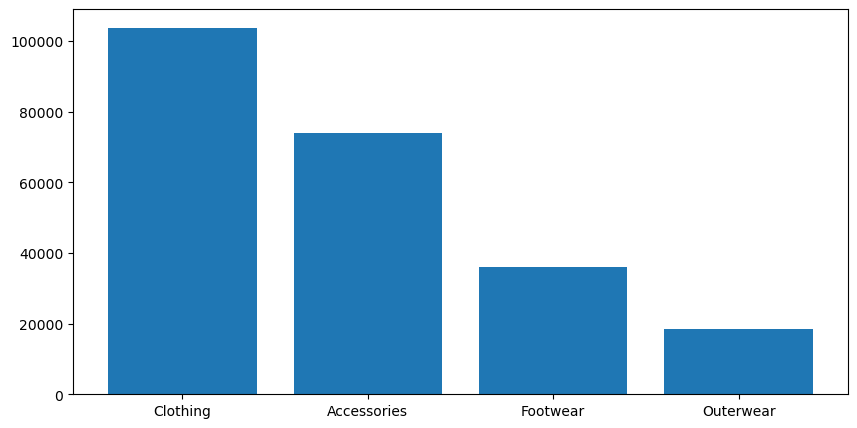

In [343]:
plt.figure(figsize=(10, 5))
plt.bar(sales_per_category.index, sales_per_category['Purchase Amount (USD)'])

Theo dữ liệu trong bảng, có một số xu hướng đáng chú ý:

- Quần áo là loại sản phẩm được khách hàng chi tiền nhiều nhất

- Giày dép là loại sản phẩm được khách hàng chi tiền nhiều thứ hai

- Phụ kiện và Đồ may mặc ngoài trời là hai loại sản phẩm khách hàng ít mua nhất. Cụ thể, doanh thu từ phụ kiện chiếm 15% tổng doanh thu và doanh thu từ đồ may mặc ngoài trời chiếm 10% tổng doanh thu.

**Kết luận:**

Kết quả này cho thấy rằng doanh nghiệp nên tập trung vào việc phát triển và quảng bá các sản phẩm quần áo và giày dép. Doanh nghiệp cũng nên cân nhắc việc cải thiện các sản phẩm phụ kiện của mình để tăng doanh số bán hàng cho doanh mục này.

#### Tần suất kích thước sản phẩm theo giới tính

In [344]:
size_by_gender = data.groupby(['Gender','Size'])['Size'].count().rename('Count').to_frame().reset_index()
size_by_gender

,Gender,Size,Count
0,Female,L,337
1,Female,M,590
2,Female,S,187
3,Female,XL,134
4,Male,L,712
5,Male,M,1159
6,Male,S,473
7,Male,XL,294


In [345]:

fig = px.sunburst(size_by_gender, path=['Gender', 'Size'], values='Count', title="The Frequency of Size By Gender", height=500)
fig.update_traces(
    textinfo='label+percent entry',
    textfont={
        "family": "tahoma",
        "size": 15,
    },
    hovertemplate="State: %{label}<br>Frequency: %{value:.0f}",
)

fig.show()

**Nhận xét**

Kích thước M là kích thước phổ biến nhất cho cả nam và nữ, với 30% khách hàng nam và 32% khách hàng nữ chọn kích thước này. Kích thước L là kích thước phổ biến thứ hai, với 18% khách hàng nam và 12% khách hàng nữ chọn kích thước này.

Biểu đồ cũng cho thấy một số khác biệt về kích thước giữa nam và nữ. Ví dụ, 5% khách hàng nữ chọn kích thước S, trong khi chỉ 3% khách hàng nam chọn kích thước này. Ngược lại, 15% khách hàng nam chọn kích thước XL, trong khi chỉ 8% khách hàng nữ chọn kích thước này.

Những phát hiện này có thể hữu ích cho các doanh nghiệp bán quần áo. Ví dụ, một doanh nghiệp có thể muốn đảm bảo rằng họ có đủ hàng tồn kho trong các kích thước phổ biến nhất, chẳng hạn như M và L. Doanh nghiệp cũng có thể muốn xem xét cung cấp các kích thước cụ thể hơn cho từng giới tính, chẳng hạn như kích thước S nhỏ hơn cho phụ nữ và kích thước XL lớn hơn cho nam giới

### Sự hài lòng của khách hàng đối với sản phẩm họ mua

Ta sẽ tính số lượng sản phẩm được bán ra tương ứng với những đánh giá từ người dùng:

- Từ 2 đến 3: Bad

- Từ 3 đến 4: Good

- Từ 4 đến 5: Excellent

In [346]:
Purchases_by_rating = data.groupby(['Review Rating']).count()['Purchase Amount (USD)'].to_frame().reset_index()
Purchases_by_rating.rename(columns={'Purchase Amount (USD)': 'Count'}, inplace=True)

In [347]:
bins = [2.0, 2.9, 3.9, 5.0]
Purchases_by_rating['Rating'] = pd.cut(Purchases_by_rating['Review Rating'], bins=bins, labels=['Bad', 'Good', 'Excellent'])
Purchases_by_rating.drop(columns=['Review Rating'], inplace=True)
Purchases_by_rating = Purchases_by_rating.groupby(['Rating']).sum().reset_index()
Purchases_by_rating

,Rating,Count
0,Bad,683
1,Good,1569
2,Excellent,1634


In [354]:
fig = px.pie(Purchases_by_rating, values='Count', names='Rating', title='Purchases by Rating')
fig.update_traces(hole=.4, hoverinfo="label+percent+name")
fig.show()

**Nhận xét**

Đa số các sản phẩm được mua đều được đánh giá từ Good đến Excellent. Điều này cho thấy rằng hầu hết các khách hàng (82,4%) hài lòng với sản phẩm mình mua và các sản phẩm được đánh giá cao được mua nhiều hơn các sản phẩm được đánh giá thấp. Điều này là một dấu hiệu tốt cho doanh nghiệp, vì nó cho thấy rằng họ đang cung cấp các sản phẩm chất lượng cao đáp ứng nhu cầu của khách hàng.

### Xét sự ảnh hưởng của việc trở thành hội viên đối với hành vi mua hàng của khách 

#### Số lượng khách hàng là hội viên

In [349]:
subscriptons = data.groupby('Subscription Status')['Subscription Status'].count().rename('Count')
subscriptons = subscriptons.to_frame()
subscriptons

,Count
Subscription Status,
No,2847
Yes,1039


Ta thấy rằng gần 3/4 số người mua hàng chưa là hội viên. Điều đó cho ta thấy được người dùng vẫn chưa đăng kí chương trình hội viên nhiều.

#### Đã có bao nhiêu thanh toán của hội viên áp dụng mã giảm giá

In [350]:
#Regarding the two customer subscription status types, how many transactions have been completed using the applicable discount?!?
discount_by_subscription = pd.crosstab(index=data['Subscription Status'], columns=data['Promo Code Used'], values=data['Promo Code Used']
                                       , aggfunc='count', normalize=0).round(2)*100
discount_by_subscription

Promo Code Used,No,Yes
Subscription Status,,
No,78.0,22.0
Yes,0.0,100.0


In [351]:
fig = px.bar(discount_by_subscription,
             text_auto="0.1f",  
             title = "Percentage(%) of Applied Discount for Each Subscription!!",
             labels = {"Subscription_Status" :"Subscription Status", "value": "Percentage(%)"},)
fig.show()

#### Nhận xét:

Tất các giao dịch mua hàng của khách hàng có đăng ký hội viên được áp dụng giảm giá. Còn những giao dịch được giảm giá của những khách hàng chưa đăng kí hội viên chỉ chiếm 22%.

Kết quả này cho thấy rằng các chương trình hội viên có thể là một cách hiệu quả để thúc đẩy doanh số bán hàng. Bằng cách cung cấp giảm giá cho các thành viên, các doanh nghiệp có thể khuyến khích các khách hàng mua sắm thường xuyên hơn và chi tiêu nhiều hơn.

#### Tần suất mua sắm của hội viên

In [352]:
freq_by_subription = data.groupby('Subscription Status')['Frequency of Purchases'].value_counts(normalize=True).rename('Percentage(%)').to_frame()*100
freq_by_subription = freq_by_subription.round(1).reset_index().rename(columns={'index': 'Frequency of Purchases'})
freq_by_subription

,Subscription Status,Frequency of Purchases,Percentage(%)
0,No,Every 3 Months,15.1
1,No,Quarterly,14.9
2,No,Annually,14.5
3,No,Bi-Weekly,14.3
4,No,Monthly,14.2
5,No,Fortnightly,13.7
6,No,Weekly,13.4
7,Yes,Annually,15.2
8,Yes,Weekly,15.0
9,Yes,Every 3 Months,14.6


In [353]:
fig = px.bar(freq_by_subription, x='Frequency of Purchases', y='Percentage(%)', text='Percentage(%)', 
             title="Frequency of Purchases by Subscription Status", height=500, color='Subscription Status')

fig.show()

##### Khách hàng có đăng ký hội viên có xu hướng mua hàng thường xuyên hơn khách hàng không có đăng ký hội viên. Cụ thể:

- Khách hàng mua sắm thường xuyên chiếm 15.2% so với tổng số người đăng kí hội viên. Con số này đối với người chưa đăng kí hội viên chỉ 14.5%

- Khách hàng mua sắm 2 lần một tuần chiếm 14.5% so với tổng số người đăng kí hội viên. Con số này đối với người chưa đăng kí hội viên chỉ 13.7%

- Khách hàng mua sắm theo từng tuần chiếm 15% so với tổng số người đăng kí hội viên. Con số này đối với người chưa đăng kí hội viên chỉ 13.4%

Kết quả này cho thấy rằng các chương trình hội viên có thể là một cách hiệu quả để khuyến khích khách hàng mua hàng thường xuyên hơn và chi tiêu nhiều hơn.

___

# III. Kết luận

Phân tích hành vi mua sắm có thể cung cấp cho các doanh nghiệp những hiểu biết quý giá về khách hàng của họ. Các doanh nghiệp có thể sử dụng những hiểu biết này để cải thiện các sản phẩm và dịch vụ của họ, phát triển các chiến lược tiếp thị và bán hàng hiệu quả hơn, và xây dựng mối quan hệ bền chặt hơn với khách hàng.

Dưới đây là một số kết luận chung từ việc phân tích hành vi người tiêu dùng

- Khách hàng có xu hướng mua những món quần áo và giày dép, các phụ kiện thời trang ít được quan tâm hơn.

- Khách hàng có xu hướng bị ảnh hưởng bởi các yếu tố như giá cả, khuyến mãi, chất lượng sản phẩm.

- Khách hàng là hội viên có xu hướng mua sắm thường xuyên hơn tuy nhiên tỷ lệ khách hàng là hội viên chưa nhiều, cần phải đưa ra nhiều ưu đãi hơn cho hội viên để thu hút được những hội viên mới.